### Import modules and read simulation data

In [1]:
from contrast.box import tpcf_monopole, projected_tpcf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
rc('text', usetex=True)

positions = np.genfromtxt("data/R101_S15.csv",
skip_header=1, delimiter=",", usecols=(0, 1, 2)
)

box_size = 2000

### Compute the monopole correlation function in 3D

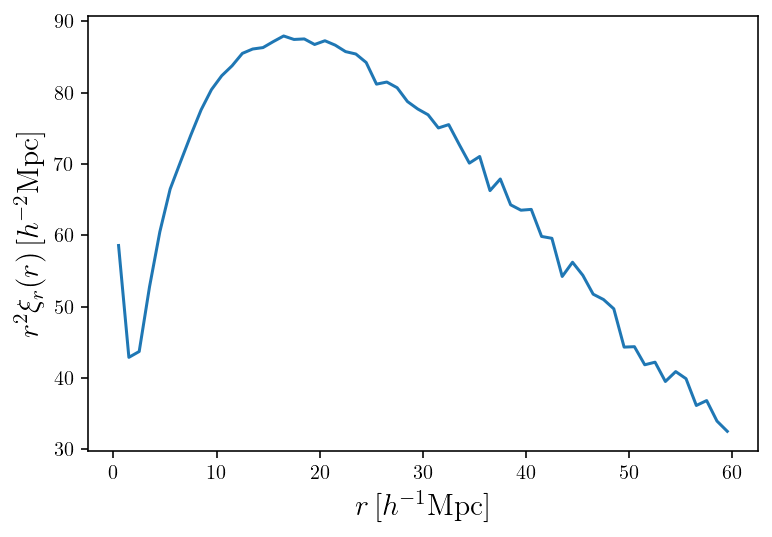

In [2]:
rbins = np.linspace(0, 60, 61)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

xi_r = tpcf_monopole(positions1=positions, box_size=box_size, rbins=rbins)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, rbins_c ** 2 * xi_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$r^2\xi_r(r)\,[h^{-2}{\rm Mpc}]$', fontsize=15)

plt.show()

### Compute the projected correlation function in the x-y plane

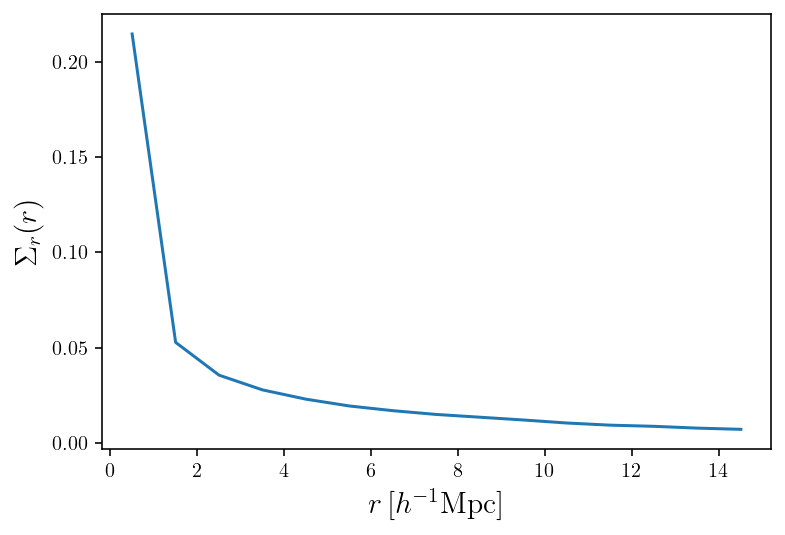

In [3]:
rbins = np.linspace(0, 15, 16)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

sigma_r = projected_tpcf(positions1=positions[:, :2], box_size=box_size, rbins=rbins)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, sigma_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$\Sigma_r(r)$', fontsize=15)

plt.show()